In [847]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from matplotlib.lines import Line2D
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FormatStrFormatter
from surprise import Dataset, Reader, accuracy
from surprise.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict, Counter
from datetime import datetime as dt
from scipy.stats import spearmanr
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import pyximport
import numpy as np
pyximport.install(setup_args={"include_dirs": np.get_include()},
                  reload_support=True)
from algorithms.knn_neighborhood import UserKNN

# Load results

In [1105]:
def load_data(name, protected):
    if protected:
        path = "protected/" + name
    else:
        path = "unprotected/" + name
    results = dict()
    results["K"] = np.load("results/" + path + "/K.npy")
    results["thresholds"] = np.load("results/" + path + "/thresholds.npy")
    
    results["mae_all_userknn_full"] = np.load("results/" + path + "/mae_all_userknn_full.npy")
    results["mae_all_userknn"] = np.load("results/" + path + "/mae_all_userknn.npy")
    results["mae_all_pop"] = np.load("results/" + path + "/mae_all_pop.npy")
    results["mae_all_gain"] = np.load("results/" + path + "/mae_all_gain.npy")
    results["mae_all_userknn_reuse"] = np.load("results/" + path + "/mae_all_userknn_reuse.npy")
    results["mae_all_pop_reuse"] = np.load("results/" + path + "/mae_all_pop_reuse.npy")
    results["mae_all_gain_reuse"] = np.load("results/" + path + "/mae_all_gain_reuse.npy")
    results["mae_all_userknn_no"] = np.load("results/" + path + "/mae_all_userknn_no.npy")
    
    results["mae_below_userknn_full"] = np.load("results/" + path + "/mae_below_userknn_full.npy")
    results["mae_below_userknn"] = np.load("results/" + path + "/mae_below_userknn.npy")
    results["mae_below_pop"] = np.load("results/" + path + "/mae_below_pop.npy")
    results["mae_below_gain"] = np.load("results/" + path + "/mae_below_gain.npy")
    results["mae_below_userknn_reuse"] = np.load("results/" + path + "/mae_below_userknn_reuse.npy")
    results["mae_below_pop_reuse"] = np.load("results/" + path + "/mae_below_pop_reuse.npy")
    results["mae_below_gain_reuse"] = np.load("results/" + path + "/mae_below_gain_reuse.npy")
    results["mae_below_userknn_no"] = np.load("results/" + path + "/mae_below_userknn_no.npy")
    
    results["mae_above_userknn_full"] = np.load("results/" + path + "/mae_above_userknn_full.npy")
    results["mae_above_userknn"] = np.load("results/" + path + "/mae_above_userknn.npy")
    results["mae_above_pop"] = np.load("results/" + path + "/mae_above_pop.npy")
    results["mae_above_gain"] = np.load("results/" + path + "/mae_above_gain.npy")
    results["mae_above_userknn_reuse"] = np.load("results/" + path + "/mae_above_userknn_reuse.npy")
    results["mae_above_pop_reuse"] = np.load("results/" + path + "/mae_above_pop_reuse.npy")
    results["mae_above_gain_reuse"] = np.load("results/" + path + "/mae_above_gain_reuse.npy")
    results["mae_above_userknn_no"] = np.load("results/" + path + "/mae_above_userknn_no.npy")
    
    results["pr_all_userknn_full"] = np.load("results/" + path + "/pr_all_userknn_full.npy")
    results["pr_all_userknn"] = np.load("results/" + path + "/pr_all_userknn.npy")
    results["pr_all_pop"] = np.load("results/" + path + "/pr_all_pop.npy")
    results["pr_all_gain"] = np.load("results/" + path + "/pr_all_gain.npy")
    results["pr_all_userknn_reuse"] = np.load("results/" + path + "/pr_all_userknn_reuse.npy")
    results["pr_all_pop_reuse"] = np.load("results/" + path + "/pr_all_pop_reuse.npy")
    results["pr_all_gain_reuse"] = np.load("results/" + path + "/pr_all_gain_reuse.npy")
    results["pr_all_userknn_no"] = np.load("results/" + path + "/pr_all_userknn_no.npy")
    
    results["pr_below_userknn_full"] = np.load("results/" + path + "/pr_below_userknn_full.npy")
    results["pr_below_userknn"] = np.load("results/" + path + "/pr_below_userknn.npy")
    results["pr_below_pop"] = np.load("results/" + path + "/pr_below_pop.npy")
    results["pr_below_gain"] = np.load("results/" + path + "/pr_below_gain.npy")
    results["pr_below_userknn_reuse"] = np.load("results/" + path + "/pr_below_userknn_reuse.npy")
    results["pr_below_pop_reuse"] = np.load("results/" + path + "/pr_below_pop_reuse.npy")
    results["pr_below_gain_reuse"] = np.load("results/" + path + "/pr_below_gain_reuse.npy")
    results["pr_below_userknn_no"] = np.load("results/" + path + "/pr_below_userknn_no.npy")
    
    results["pr_above_userknn_full"] = np.load("results/" + path + "/pr_above_userknn_full.npy")
    results["pr_above_userknn"] = np.load("results/" + path + "/pr_above_userknn.npy")
    results["pr_above_pop"] = np.load("results/" + path + "/pr_above_pop.npy")
    results["pr_above_gain"] = np.load("results/" + path + "/pr_above_gain.npy")
    results["pr_above_userknn_reuse"] = np.load("results/" + path + "/pr_above_userknn_reuse.npy")
    results["pr_above_pop_reuse"] = np.load("results/" + path + "/pr_above_pop_reuse.npy")
    results["pr_above_gain_reuse"] = np.load("results/" + path + "/pr_above_gain_reuse.npy")
    results["pr_above_userknn_no"] = np.load("results/" + path + "/pr_above_userknn_no.npy")
    
    results["secures_userknn_full"] = np.load("results/" + path + "/secures_userknn_full.npy")
    results["secures_userknn"] = np.load("results/" + path + "/secures_userknn.npy")
    results["secures_pop"] = np.load("results/" + path + "/secures_pop.npy")
    results["secures_gain"] = np.load("results/" + path + "/secures_gain.npy")
    results["secures_userknn_reuse"] = np.load("results/" + path + "/secures_userknn_reuse.npy")
    results["secures_pop_reuse"] = np.load("results/" + path + "/secures_pop_reuse.npy")
    results["secures_gain_reuse"] = np.load("results/" + path + "/secures_gain_reuse.npy")
    results["secures_userknn_no"] = np.load("results/" + path + "/secures_userknn_no.npy")
    
    results["vulnerables_userknn_full"] = np.load("results/" + path + "/vulnerables_userknn_full.npy")
    results["vulnerables_userknn"] = np.load("results/" + path + "/vulnerables_userknn.npy")
    results["vulnerables_pop"] = np.load("results/" + path + "/vulnerables_pop.npy")
    results["vulnerables_gain"] = np.load("results/" + path + "/vulnerables_gain.npy")
    results["vulnerables_userknn_reuse"] = np.load("results/" + path + "/vulnerables_userknn_reuse.npy")
    results["vulnerables_pop_reuse"] = np.load("results/" + path + "/vulnerables_pop_reuse.npy")
    results["vulnerables_gain_reuse"] = np.load("results/" + path + "/vulnerables_gain_reuse.npy")
    results["vulnerables_userknn_no"] = np.load("results/" + path + "/vulnerables_userknn_no.npy")
    
    if protected:
        results["nr_noisy_ratings_userknn_full"] = np.load("results/" + path + "/nr_noisy_ratings_userknn_full.npy")
        results["nr_noisy_ratings_userknn"] = np.load("results/" + path + "/nr_noisy_ratings_userknn.npy")
        results["nr_noisy_ratings_pop"] = np.load("results/" + path + "/nr_noisy_ratings_pop.npy")
        results["nr_noisy_ratings_gain"] = np.load("results/" + path + "/nr_noisy_ratings_gain.npy")
        results["nr_noisy_ratings_userknn_reuse"] = np.load("results/" + path + "/nr_noisy_ratings_userknn_reuse.npy")
        results["nr_noisy_ratings_pop_reuse"] = np.load("results/" + path + "/nr_noisy_ratings_pop_reuse.npy")
        results["nr_noisy_ratings_gain_reuse"] = np.load("results/" + path + "/nr_noisy_ratings_gain_reuse.npy")
        results["nr_noisy_ratings_userknn_no"] = np.load("results/" + path + "/nr_noisy_ratings_userknn_no.npy")
    
    return results

In [1106]:
%matplotlib inline

In [914]:
%matplotlib qt

## all users, protected

In [1210]:
ml100k_results = load_data(name="ml-100k", protected=True)
ml1m_results = load_data(name="ml-1m", protected=True)
#jester_results = load_data(name="jester", protected=True)
#jester_results = load_data(name="foursquare", protected=True)
goodreads_results = load_data(name="goodreads", protected=True)

def plot_k_mae(ax, results):
    markers = ["o", "s", "p", "*", "+", "D"]
    
    for idx in range(len(markers)):
        ax.scatter(results["K"][idx], results["mae_all_userknn_full"][idx], color="gray", alpha=0.75, marker=markers[idx])
        ax.scatter(results["K"][idx], results["mae_all_userknn"][idx], color="C0", alpha=0.5, marker=markers[idx])
        ax.scatter(results["K"][idx], results["mae_all_pop"][idx], color="C1", alpha=0.5, marker=markers[idx])
        ax.scatter(results["K"][idx], results["mae_all_gain"][idx], color="C2", alpha=0.5, marker=markers[idx])
        ax.scatter(results["K"][idx], results["mae_all_userknn_reuse"][idx], color="C0", marker=markers[idx])
        ax.scatter(results["K"][idx], results["mae_all_pop_reuse"][idx], color="C1", marker=markers[idx])
        ax.scatter(results["K"][idx], results["mae_all_gain_reuse"][idx], color="C2", marker=markers[idx])
        ax.scatter(results["K"][idx], results["mae_all_userknn_no"][idx], color="gray", marker=markers[idx])
        
    ax.plot(results["K"], results["mae_all_userknn_full"], color="gray", linestyle="dashed", alpha=0.75, linewidth=1)
    ax.plot(results["K"], results["mae_all_userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["K"], results["mae_all_pop"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["K"], results["mae_all_gain"], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["K"], results["mae_all_userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(results["K"], results["mae_all_pop_reuse"], color="C1", linestyle="solid")
    ax.plot(results["K"], results["mae_all_gain_reuse"], color="C2", linestyle="solid")
    ax.plot(results["K"], results["mae_all_userknn_no"], color="gray", linestyle="solid", alpha=0.75, linewidth=1)

fig, axes = plt.subplots(1, 3, figsize=(9, 4), sharex=False)
plot_k_mae(axes[0], ml100k_results)
plot_k_mae(axes[1], ml1m_results)
#plot_k_mae(axes[2], jester_results)
plot_k_mae(axes[2], goodreads_results)

axes[0].set_ylabel("Mean absolute error")
axes[0].set_xlabel("Nr. of neighbors")
axes[1].set_xlabel("Nr. of neighbors")
axes[2].set_xlabel("Nr. of neighbors")
#axes[3].set_xlabel("Nr. of neighbors")
axes[0].set_title("MovieLens 100k")
axes[1].set_title("MovieLens 1M")
#axes[2].set_title("Jester")
axes[2].set_title("Goodreads")

colors = ['gray', 'C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["FullKNN", "NoKNN", "UserKNN", "UserKNN+Reuse", "Popularity", "Popularity+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=4, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)

fig.align_ylabels(axes)

## accuracy vs. privacy risk [all users, protected, privacy risk of vulnerables set to 0]

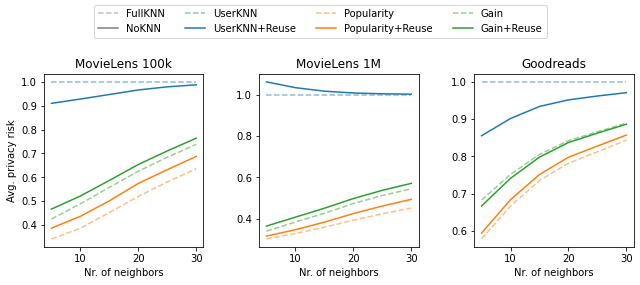

In [1113]:
ml100k_results = load_data(name="ml-100k", protected=True)
ml1m_results = load_data(name="ml-1m", protected=True)
#jester_results = load_data(name="jester", protected=True)
#jester_results = load_data(name="foursquare", protected=True)
goodreads_results = load_data(name="goodreads", protected=True)

def plot_mae_pr(ax, results):
    #ax.plot(results["K"], results["pr_all_userknn_full"], color="gray", linestyle="dashed", alpha=0.75)
    ax.plot(results["K"], (results["pr_all_userknn"]) / results["pr_all_userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["K"], (results["pr_all_pop"]) / results["pr_all_userknn"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["K"], (results["pr_all_gain"]) / results["pr_all_userknn"], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["K"], (results["pr_all_userknn_reuse"]) / results["pr_all_userknn"], color="C0", linestyle="solid")
    ax.plot(results["K"], (results["pr_all_pop_reuse"]) / results["pr_all_userknn"], color="C1", linestyle="solid")
    ax.plot(results["K"], (results["pr_all_gain_reuse"]) / results["pr_all_userknn"], color="C2", linestyle="solid")
    #ax.plot(results["K"], (results["pr_all_userknn_no"]), color="gray", linestyle="solid", alpha=0.75)
    
fig, axes = plt.subplots(1, 3, figsize=(9, 4), sharex=False)
plot_mae_pr(axes[0], ml100k_results)
plot_mae_pr(axes[1], ml1m_results)
#plot_mae_pr(axes[2], jester_results)
plot_mae_pr(axes[2], goodreads_results)

axes[0].set_ylabel("Avg. privacy risk")
axes[0].set_xlabel("Nr. of neighbors")
axes[1].set_xlabel("Nr. of neighbors")
axes[2].set_xlabel("Nr. of neighbors")
#axes[3].set_xlabel("Log avg. privacy risk")
axes[0].set_title("MovieLens 100k")
axes[1].set_title("MovieLens 1M")
#axes[2].set_title("Jester")
axes[2].set_title("Goodreads")

colors = ['gray', 'C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["FullKNN", "NoKNN", "UserKNN", "UserKNN+Reuse", "Popularity", "Popularity+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=4, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)

fig.align_ylabels(axes)

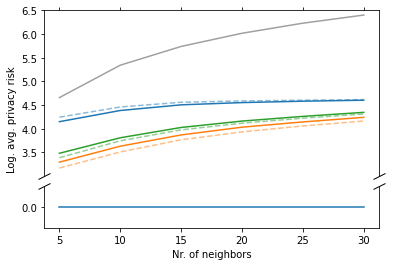

In [1109]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]})
fig.subplots_adjust(hspace=0.1)

ax = fig.add_subplot(111, frameon=False)
ax.set_ylabel("Log. avg. privacy risk")
ax.set_xlabel("Nr. of neighbors")
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)

results = load_data(name="ml-100k", protected=True)
ax1.plot(results["K"], np.log(results["pr_all_userknn"]), color="C0", linestyle="dashed", alpha=0.5)
ax1.plot(results["K"], np.log(results["pr_all_pop"]), color="C1", linestyle="dashed", alpha=0.5)
ax1.plot(results["K"], np.log(results["pr_all_gain"]), color="C2", linestyle="dashed", alpha=0.5)
ax1.plot(results["K"], np.log(results["pr_all_userknn_reuse"]), color="C0", linestyle="solid")
ax1.plot(results["K"], np.log(results["pr_all_pop_reuse"]), color="C1", linestyle="solid")
ax1.plot(results["K"], np.log(results["pr_all_gain_reuse"]), color="C2", linestyle="solid")
ax1.plot(results["K"], np.log(results["pr_all_userknn_no"]), color="gray", linestyle="solid", alpha=0.75)
ax2.plot(results["K"], results["pr_all_userknn_full"])

ax1.set_ylim(3, 6.5)
ax2.set_ylim(-0.25, 0.25)

ax1.spines["bottom"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

ticks = ax1.get_yticks()
ax1.set_yticks(ticks[1:])
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax2.set_yticks([0.0])

d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()

In [1209]:
ml100k_results = load_data(name="ml-100k", protected=True)
ml1m_results = load_data(name="ml-1m", protected=True)
#jester_results = load_data(name="jester", protected=True)
#jester_results = load_data(name="foursquare", protected=True)
goodreads_results = load_data(name="goodreads", protected=True)

def plot_mae_pr(axes, results):
    """ax.plot(results["K"], results["pr_all_userknn_full"], color="gray", linestyle="dashed", alpha=0.75)
    ax.plot(results["K"], np.log(results["pr_all_userknn"]), color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["K"], np.log(results["pr_all_pop"]), color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["K"], np.log(results["pr_all_gain"]), color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["K"], np.log(results["pr_all_userknn_reuse"]), color="C0", linestyle="solid")
    ax.plot(results["K"], np.log(results["pr_all_pop_reuse"]), color="C1", linestyle="solid")
    ax.plot(results["K"], np.log(results["pr_all_gain_reuse"]), color="C2", linestyle="solid")
    ax.plot(results["K"], np.log(results["pr_all_userknn_no"]), color="gray", linestyle="solid", alpha=0.75)"""
    
    #fig, (ax1, ax2) = ax.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 1]})
    #fig.subplots_adjust(hspace=0.1)

    #ax = fig.add_subplot(111, frameon=False)
    #ax.set_ylabel("Log. avg. privacy risk")
    #ax.set_xlabel("Nr. of neighbors")
    #ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    #ax.grid(False)

    ax1, ax2 = axes
    
    ax1.plot(results["K"], np.log10(results["pr_all_userknn"]), color="C0", linestyle="dashed", alpha=0.5)
    ax1.plot(results["K"], np.log10(results["pr_all_pop"]), color="C1", linestyle="dashed", alpha=0.5)
    ax1.plot(results["K"], np.log10(results["pr_all_gain"]), color="C2", linestyle="dashed", alpha=0.5)
    ax1.plot(results["K"], np.log10(results["pr_all_userknn_reuse"]), color="C0", linestyle="solid")
    ax1.plot(results["K"], np.log10(results["pr_all_pop_reuse"]), color="C1", linestyle="solid")
    ax1.plot(results["K"], np.log10(results["pr_all_gain_reuse"]), color="C2", linestyle="solid")
    ax1.plot(results["K"], np.log10(results["pr_all_userknn_no"]), color="gray", linestyle="solid", alpha=0.75)
    ax2.plot(results["K"], results["pr_all_userknn_full"], color="gray", linestyle="dashed", alpha=0.75)
    
    ymax = max(np.log10(results["pr_all_userknn_no"]))
    ymin = min(np.log10(results["pr_all_pop"]))
    ax1.set_ylim(ymin-0.2, ymax)
    
    #ax1.set_ylim(3, 6.8)
    ax2.set_ylim(-0.25, 0.25)

    ax1.spines["bottom"].set_visible(False)
    ax2.spines["top"].set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False)
    ax2.xaxis.tick_bottom()

    ticks = ax1.get_yticks()
    ax1.set_yticks(ticks[1:])
    ax2.set_yticks([0.0])
    
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    d = .5
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10,
                  linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)
    
fig, axes = plt.subplots(2, 3, figsize=(9, 4), gridspec_kw={"hspace": 0.05, "height_ratios": [4, 1]})
#fig.subplots_adjust(hspace=0)
ax = fig.add_subplot(111, frameon=False)
ax.set_ylabel("Log. avg. privacy risk")
#ax.set_xlabel("Nr. of neighbors")
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
plot_mae_pr(axes[:, 0], ml100k_results)
plot_mae_pr(axes[:, 1], ml1m_results)
plot_mae_pr(axes[:, 2], goodreads_results)

axes[0, 0].set_title("MovieLens 100k")
axes[0, 1].set_title("MovieLens 1M")
axes[0, 2].set_title("Goodreads")

axes[1, 0].set_xlabel("Nr. of neighbors")
axes[1, 1].set_xlabel("Nr. of neighbors")
axes[1, 2].set_xlabel("Nr. of neighbors")

colors = ['gray', 'C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["FullKNN", "NoKNN", "UserKNN", "UserKNN+Reuse", "Popularity", "Popularity+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=4, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)

fig.align_ylabels(axes)

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:91: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


# nr. vulnerable users

In [537]:
def plot_vulnerables(ax, results):
    """ax.plot(results["mae_all_userknn"], results["vulnerables_userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_all_pop"], results["vulnerables_pop"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_all_gain"], results["vulnerables_gain"], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["mae_all_userknn_reuse"], results["vulnerables_userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(results["mae_all_pop_reuse"], results["vulnerables_pop_reuse"], color="C1", linestyle="solid")
    ax.plot(results["mae_all_gain_reuse"], results["vulnerables_gain_reuse"], color="C2", linestyle="solid")"""
    
    ax.plot(results["vulnerables_userknn"], results["mae_all_userknn"], color="C0", linestyle="dashed", alpha=0.5)
    ax.plot(results["vulnerables_pop"], results["mae_all_pop"], color="C1", linestyle="dashed", alpha=0.5)
    ax.plot(results["vulnerables_gain"], results["mae_all_gain"], color="C2", linestyle="dashed", alpha=0.5)
    ax.plot(results["vulnerables_userknn_reuse"], results["mae_all_userknn_reuse"], color="C0", linestyle="solid")
    ax.plot(results["vulnerables_pop_reuse"], results["mae_all_pop_reuse"], color="C1", linestyle="solid")
    ax.plot(results["vulnerables_gain_reuse"], results["mae_all_gain_reuse"], color="C2", linestyle="solid")

ml100k_results = load_data("ml-100k", protected=True)
#ml1m_results = load_data("/protected/ml-1m")
#jester_results = load_data("jester", protected=True)
#goodreads_results = load_data("/protected/goodreads")

fig, axes = plt.subplots(1, 4, figsize=(9, 4), sharex=False)
plot_vulnerables(axes[0], ml100k_results)
#plot_vulnerables(axes[1], ml1m_results)
#plot_vulnerables(axes[2], jester_results)
#plot_vulnerables(axes[3], goodreads_results)

axes[0].set_xlabel("Nr. of vulnerables")
axes[1].set_xlabel("Nr. of vulnerables")
axes[2].set_xlabel("Nr. of vulnerables")
axes[3].set_xlabel("Nr. of vulnerables")
axes[0].set_ylabel("Mean absolute error")
axes[0].set_title("MovieLens 100k")
axes[1].set_title("MovieLens 1M")
axes[2].set_title("Jester")
axes[3].set_title("Goodreads")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Popularity", "Popularity+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=.75, bottom=0.15, hspace=0.35, wspace=0.35)

fig.align_ylabels(axes)

In [ ]:
# trade-off protected all users (privacy risk of protected/vulnerable users set to 0)

# Vulnerable neighbors + trade-off below threshold

In [368]:
fig, axes = plt.subplots(2, 4, figsize=(9, 6), sharex=False)
plot_exposure(axes[0, 0], ml100k_results)
plot_exposure(axes[0, 1], ml1m_results)
plot_exposure(axes[0, 2], jester_results)
plot_exposure(axes[0, 3], goodreads_results)

plot_vulnerables(axes[1, 0], ml100k_results)
plot_vulnerables(axes[1, 1], ml1m_results)
plot_vulnerables(axes[1, 2], jester_results)
plot_vulnerables(axes[1, 3], goodreads_results)

axes[0, 0].set_ylabel("Avg. privacy risk")
axes[1, 0].set_xlabel("Mean absolute error")
axes[1, 1].set_xlabel("Mean absolute error")
axes[1, 2].set_xlabel("Mean absolute error")
axes[1, 3].set_xlabel("Mean absolute error")
axes[1, 0].set_ylabel("Nr. of vulnerables")
axes[0, 0].set_title("MovieLens 100k")
axes[0, 1].set_title("MovieLens 1M")
axes[0, 2].set_title("Jester")
axes[0, 3].set_title("Goodreads")

colors = ['C0', 'C1', 'C2']
lines = []
labels = []
for c in colors:
    lines.append(Line2D([0], [0], color=c, linestyle='dashed', alpha=0.5))
    lines.append(Line2D([0], [0], color=c, linestyle="solid"))
labels = ["UserKNN", "UserKNN+Reuse", "Popularity", "Popularity+Reuse", "Gain", "Gain+Reuse"]

fig.legend(lines, labels, ncol=3, loc='upper center')
fig.tight_layout()
fig.subplots_adjust(top=0.8, bottom=0.2, hspace=0.35, wspace=0.25)

fig.align_ylabels(axes)

# Intro Figure

In [1205]:
%matplotlib qt
def double_exponential(x, alpha):
    return 1 / np.exp(np.exp(alpha * x))

fig, ax = plt.subplots(1, 2, sharey=True, sharex=True)

x = np.linspace(0, 100, 1000)
x_ = double_exponential(x, alpha=0.02) * 0.5
threshold = x[np.argmax(np.gradient(np.gradient(x_)))]
ax[0].fill_between(x[x <= threshold], 0, x_[x <= threshold], color="green", label="Secure", edgecolor="black", hatch="//")
ax[0].fill_between(x[x >= threshold][:-200], 0, x_[x >= threshold][:-200], color="red", label="Vulnerable")
ax[0].axvline(x=threshold, linestyle="dashed", linewidth=1, color="black")
ax[0].set_ylabel("Nr. of users")
ax[0].set_xlabel("Privacy risk")
ax[0].text(threshold-7, 0.25, r"Threshold $\tau$", rotation=90)

ax[0].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])
ax[0].set_yticklabels([0, 100, 200, 300, 400, 500, 600, 700])
#ax[0].set_ylim([0, 1])
ax[0].set_title("UserKNN")
ax[0].legend()

x = np.linspace(0, 100, 1000)
x_ = double_exponential(x, alpha=0.05) * 2 #double_exponential(x, alpha=0.06) * 2
ax[1].fill_between(x[x <= threshold], 0, x_[x <= threshold], color="green", label="Secure", edgecolor="black", hatch="//")
ax[1].fill_between(x[x >= threshold], 0, x_[x >= threshold], color="red", label="Vulnerable", hatch="//")
#ax[1].fill_between(np.linspace(95, 100, 200), 0, x_[:200][::-1] * 0.5, color="red")
#plt.plot(np.linspace(90, 100, 200), x_[:200][::-1]*0.5)
ax[1].axvline(x=threshold, c="black", linestyle="dashed", linewidth=1)
ax[1].text(threshold-7, 0.25, r"Threshold $\tau$", rotation=90, color="black")
ax[1].set_xlabel("Privacy risk")
ax[1].set_title("ReuseKNN")
ax[1].legend()

In [830]:
df = pd.read_csv("data/ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"], usecols=["user_id", "item_id", "rating"])
df.groupby("item_id")["rating"].std().mean()

1.0567144528273058

In [831]:
df = pd.read_csv("data/ml-1m/ratings.dat", sep="::", names=["user_id", "item_id", "rating", "timestamp"], usecols=["user_id", "item_id", "rating"])
df.groupby("item_id")["rating"].std().mean()

C:\Users\pmuellner\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


1.0112571461714301

In [828]:
df = pd.read_csv("data/jester/sample.csv", sep=";", header=None, names=["user_id", "item_id", "rating"])
df.groupby("item_id")["rating"].std().mean()

5.0462659371993945

In [832]:
df = pd.read_csv("data/goodreads/sample.csv", sep=";", header=None, names=["user_id", "item_id", "rating"])
df.groupby("item_id")["rating"].std().mean()

1.4846369197936895